In [79]:
## NEED TO ADJUST FOR INFLATION

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import inflation function from GDP Housing Analysis
import common_functions

In [80]:
# import GDP data broken out by industry
gdp_ind = pd.read_csv('../DataSet/VirginiaGDPbyIndustry1997-2019.csv')
# check to make sure data loaded correctly
gdp_ind

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,"""51000""",Virginia,5.0,SAGDP8N,1.0,...,All industry total,Quantity index,67.109,70.768,...,98.392,99.357,100.0,100.338,100.375,102.406,103.384,105.168,107.574,109.896
1,"""51000""",Virginia,5.0,SAGDP8N,2.0,...,Private industries,Quantity index,64.574,68.866,...,98.144,99.313,100.0,100.632,100.668,103.017,103.910,106.027,108.902,111.552
2,"""51000""",Virginia,5.0,SAGDP8N,3.0,11,"Agriculture, forestry, fishing and hunting",Quantity index,93.810,98.432,...,107.383,108.843,100.0,111.929,120.852,131.415,129.985,140.662,132.929,134.957
3,"""51000""",Virginia,5.0,SAGDP8N,4.0,111-112,Farms,Quantity index,97.191,101.042,...,112.841,113.347,100.0,115.408,125.562,136.355,134.045,150.535,139.636,143.209
4,"""51000""",Virginia,5.0,SAGDP8N,5.0,113-115,"Forestry, fishing, and related activities",Quantity index,85.923,92.689,...,89.623,93.754,100.0,100.237,105.276,114.949,115.449,113.917,112.935,111.850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,"""51000""",Virginia,5.0,SAGDP8N,92.0,...,Private services-providing industries 3/,Quantity index,58.984,63.438,...,97.378,98.940,100.0,100.590,101.609,104.031,105.567,107.593,110.420,113.494
92,Note: See the included footnote file.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
93,SAGDP8N: Chain-type quantity indexes for real ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
94,"Last updated: October 2, 2020-- revised statis...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [81]:
# remove rows of notes at the bottom
gdp_ind = gdp_ind.dropna(axis=0)
# should be 92 rows
gdp_ind

,GeoFIPS,GeoName,Region,TableName,LineCode,IndustryClassification,Description,Unit,1997,1998,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,"""51000""",Virginia,5.0,SAGDP8N,1.0,...,All industry total,Quantity index,67.109,70.768,...,98.392,99.357,100.0,100.338,100.375,102.406,103.384,105.168,107.574,109.896
1,"""51000""",Virginia,5.0,SAGDP8N,2.0,...,Private industries,Quantity index,64.574,68.866,...,98.144,99.313,100.0,100.632,100.668,103.017,103.910,106.027,108.902,111.552
2,"""51000""",Virginia,5.0,SAGDP8N,3.0,11,"Agriculture, forestry, fishing and hunting",Quantity index,93.810,98.432,...,107.383,108.843,100.0,111.929,120.852,131.415,129.985,140.662,132.929,134.957
3,"""51000""",Virginia,5.0,SAGDP8N,4.0,111-112,Farms,Quantity index,97.191,101.042,...,112.841,113.347,100.0,115.408,125.562,136.355,134.045,150.535,139.636,143.209
4,"""51000""",Virginia,5.0,SAGDP8N,5.0,113-115,"Forestry, fishing, and related activities",Quantity index,85.923,92.689,...,89.623,93.754,100.0,100.237,105.276,114.949,115.449,113.917,112.935,111.850
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,"""51000""",Virginia,5.0,SAGDP8N,88.0,"42, 44-45",Trade,Quantity index,72.078,78.318,...,99.537,100.169,100.0,103.094,103.856,107.006,109.356,111.651,113.143,114.318
88,"""51000""",Virginia,5.0,SAGDP8N,89.0,...,Transportation and utilities,Quantity index,81.694,84.049,...,99.083,100.079,100.0,98.490,97.965,101.355,103.196,104.991,106.244,108.745
89,"""51000""",Virginia,5.0,SAGDP8N,90.0,...,Manufacturing and information,Quantity index,75.372,82.001,...,108.651,105.264,100.0,103.140,100.581,104.464,102.693,103.535,107.809,111.258
90,"""51000""",Virginia,5.0,SAGDP8N,91.0,...,Private goods-producing industries 2/,Quantity index,93.942,97.349,...,102.010,101.190,100.0,100.840,96.064,98.062,95.876,98.423,101.530,102.116


In [82]:
# limit date range to the 2000-2016 date range (by dropping columns)
gdp_ind = gdp_ind.drop(columns=['1997','1998','1999','2017','2018','2019'])
# check to make sure 2000-2016 remain
gdp_ind.columns

Index(['GeoFIPS', 'GeoName', 'Region', 'TableName', 'LineCode',
       'IndustryClassification', 'Description', 'Unit', '2000', '2001', '2002',
       '2003', '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011',
       '2012', '2013', '2014', '2015', '2016'],
      dtype='object')

In [84]:

columns=gdp_ind.iloc[:,8:]
columns

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,77.956,80.634,81.397,84.514,88.478,93.370,95.136,95.909,95.945,95.745,98.392,99.357,100.0,100.338,100.375,102.406,103.384
1,76.838,80.040,80.510,83.873,87.990,93.574,95.514,96.023,95.574,95.133,98.144,99.313,100.0,100.632,100.668,103.017,103.910
2,126.116,111.753,104.573,96.326,123.538,135.898,126.599,98.193,102.715,123.657,107.383,108.843,100.0,111.929,120.852,131.415,129.985
3,137.945,115.691,106.998,92.815,128.884,147.810,131.090,95.909,102.571,132.349,112.841,113.347,100.0,115.408,125.562,136.355,134.045
4,100.759,104.676,101.161,108.063,109.780,103.919,112.597,102.243,100.224,97.536,89.623,93.754,100.0,100.237,105.276,114.949,115.449
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,86.534,89.181,92.416,98.999,102.833,107.094,107.900,106.979,104.186,96.876,99.537,100.169,100.0,103.094,103.856,107.006,109.356
88,88.469,76.968,76.684,75.548,83.955,81.363,93.828,89.631,91.969,92.705,99.083,100.079,100.0,98.490,97.965,101.355,103.196
89,92.185,96.810,92.325,93.477,101.707,105.878,105.630,107.083,103.128,104.438,108.651,105.264,100.0,103.140,100.581,104.464,102.693
90,111.209,116.053,106.415,108.098,112.941,115.084,113.675,108.058,100.865,99.431,102.010,101.190,100.0,100.840,96.064,98.062,95.876


In [91]:
gdp_ind['2000']
# gdp_inf = gdp_ind['2000'].apply(sum)
# gdp_inf

0      77.956
1      76.838
2     126.116
3     137.945
4     100.759
       ...   
87     86.534
88     88.469
89     92.185
90    111.209
91     70.294
Name: 2000, Length: 92, dtype: float64

In [88]:
# adjust for inflation

gdp_inf = gdp_ind[columns].apply(common_functions.inflation_adjust_set)
gdp_inf

ValueError: Boolean array expected for the condition, not float64

In [5]:
# remove all but the most relevant columns
gdp_ind = gdp_ind.drop(columns=['GeoFIPS', 'GeoName', 'Region', 'TableName', 'LineCode', 'IndustryClassification', 'Unit'])
gdp_ind = gdp_ind.reset_index(drop=True)
gdp_ind.columns

Index(['Description', '2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016'],
      dtype='object')

In [6]:
# drop index and transpose
gdp_ind = gdp_ind.set_index('Description').T
gdp_ind = gdp_ind.dropna(axis=1)
gdp_ind.index.names = ['Year']
# check that years are now the index of the rows and type of industry is now the columns.  Also check that the index is named "year"
gdp_ind

Description,All industry total,Private industries,"Agriculture, forestry, fishing and hunting",Farms,"Forestry, fishing, and related activities","Mining, quarrying, and oil and gas extraction",Oil and gas extraction,Mining (except oil and gas),Support activities for mining,Utilities,...,Government and government enterprises,Federal civilian,Military,State and local,Natural resources and mining,Trade,Transportation and utilities,Manufacturing and information,Private goods-producing industries 2/,Private services-providing industries 3/
Year,,,,,,,,,,,,,,,,,,,,,
2000,77.956,76.838,126.116,137.945,100.759,134.340,128.190,149.474,37.273,89.027,...,83.380,74.661,84.215,89.566,132.838,86.534,88.469,92.185,111.209,70.294
2001,80.634,80.040,111.753,115.691,104.676,145.573,141.643,157.965,64.331,75.577,...,83.362,73.703,84.599,90.035,128.844,89.181,76.968,96.810,116.053,73.185
2002,81.397,80.510,104.573,106.998,101.161,130.435,154.446,138.189,63.906,77.838,...,85.594,76.748,87.431,91.326,118.081,92.416,76.684,92.325,106.415,75.557
2003,84.514,83.873,96.326,92.815,108.063,138.915,137.626,148.764,75.419,73.744,...,87.514,77.924,91.236,92.761,117.031,98.999,75.548,93.477,108.098,79.232
2004,88.478,87.990,123.538,128.884,109.780,149.411,231.960,148.347,92.932,78.309,...,90.741,82.732,93.945,95.052,137.356,102.833,83.955,101.707,112.941,83.208
2005,93.370,93.574,135.898,147.810,103.919,136.304,127.461,142.866,115.231,73.913,...,92.399,82.605,96.195,97.756,137.362,107.094,81.363,105.878,115.084,89.433
2006,95.136,95.514,126.599,131.090,112.597,156.238,137.444,157.552,206.330,77.634,...,93.356,83.821,99.194,97.363,144.348,107.900,93.828,105.630,113.675,92.012
2007,95.909,96.023,98.193,95.909,102.243,141.969,139.183,139.554,209.128,78.744,...,95.334,87.292,100.495,98.569,123.620,106.979,89.631,107.083,108.058,93.690
2008,95.945,95.574,102.715,102.571,100.224,144.325,142.204,141.612,214.582,84.796,...,97.549,89.987,103.679,99.881,126.967,104.186,91.969,103.128,100.865,94.529


In [7]:
# get evictions data
evc_data = pd.read_csv(r'../DataSet/va_eviction_cities.csv',header=0,encoding = "ISO-8859-1")
evc_data

,GEOID,year,name,parent-location,population,poverty-rate,renter-occupied-households,pct-renter-occupied,median-gross-rent,median-household-income,...,pct-nh-pi,pct-multiple,pct-other,eviction-filings,evictions,eviction-rate,eviction-filing-rate,low-flag,imputed,subbed
0,5100148,2000,Abingdon,Virginia,7780.0,10.06,1398.75,41.94,440.0,30976.0,...,0.01,0.58,0.05,29.86,28.86,2.06,2.13,0,0,0
1,5100148,2001,Abingdon,Virginia,7780.0,10.06,1438.06,41.94,440.0,30976.0,...,0.01,0.58,0.05,38.50,33.80,2.35,2.68,0,0,0
2,5100148,2002,Abingdon,Virginia,7780.0,10.06,1474.88,41.94,440.0,30976.0,...,0.01,0.58,0.05,61.25,47.14,3.20,4.15,0,0,0
3,5100148,2003,Abingdon,Virginia,7780.0,10.06,1514.18,41.94,440.0,30976.0,...,0.01,0.58,0.05,53.00,31.00,2.05,3.50,0,0,0
4,5100148,2004,Abingdon,Virginia,7780.0,10.06,1552.00,41.94,440.0,30976.0,...,0.01,0.58,0.05,84.20,57.86,3.73,5.43,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10118,5188240,2012,Yorktown,Virginia,130.0,0.00,46.20,51.06,1000.0,62750.0,...,0.00,11.54,0.00,0.70,0.70,1.52,1.52,0,0,0
10119,5188240,2013,Yorktown,Virginia,130.0,0.00,46.90,51.06,1000.0,62750.0,...,0.00,11.54,0.00,0.70,0.00,0.00,1.49,0,0,0
10120,5188240,2014,Yorktown,Virginia,130.0,0.00,47.60,51.06,1000.0,62750.0,...,0.00,11.54,0.00,2.80,0.00,0.00,5.88,1,0,0
10121,5188240,2015,Yorktown,Virginia,130.0,0.00,49.00,51.06,1000.0,62750.0,...,0.00,11.54,0.00,2.80,0.00,0.00,5.71,1,0,0


In [8]:
# check the count of richmond evictions, etc
evc_data[evc_data['name']=='Richmond'].count()

GEOID                         17
year                          17
name                          17
parent-location               17
population                    17
poverty-rate                  17
renter-occupied-households    17
pct-renter-occupied           17
median-gross-rent             17
median-household-income       17
median-property-value         17
rent-burden                   17
pct-white                     17
pct-af-am                     17
pct-hispanic                  17
pct-am-ind                    17
pct-asian                     17
pct-nh-pi                     17
pct-multiple                  17
pct-other                     17
eviction-filings              17
evictions                     17
eviction-rate                 17
eviction-filing-rate          17
low-flag                      17
imputed                       17
subbed                        17
dtype: int64

In [9]:
# filtered by Richmond
evc_ric = evc_data[evc_data['name']=='Richmond']
# ensure the counts match above
evc_ric.count()

GEOID                         17
year                          17
name                          17
parent-location               17
population                    17
poverty-rate                  17
renter-occupied-households    17
pct-renter-occupied           17
median-gross-rent             17
median-household-income       17
median-property-value         17
rent-burden                   17
pct-white                     17
pct-af-am                     17
pct-hispanic                  17
pct-am-ind                    17
pct-asian                     17
pct-nh-pi                     17
pct-multiple                  17
pct-other                     17
eviction-filings              17
evictions                     17
eviction-rate                 17
eviction-filing-rate          17
low-flag                      17
imputed                       17
subbed                        17
dtype: int64

In [10]:
evc_ric.dtypes

GEOID                           int64
year                            int64
name                           object
parent-location                object
population                    float64
poverty-rate                  float64
renter-occupied-households    float64
pct-renter-occupied           float64
median-gross-rent             float64
median-household-income       float64
median-property-value         float64
rent-burden                   float64
pct-white                     float64
pct-af-am                     float64
pct-hispanic                  float64
pct-am-ind                    float64
pct-asian                     float64
pct-nh-pi                     float64
pct-multiple                  float64
pct-other                     float64
eviction-filings              float64
evictions                     float64
eviction-rate                 float64
eviction-filing-rate          float64
low-flag                        int64
imputed                         int64
subbed      

In [11]:
# isolate the evictions column from evictions data
evc_only = evc_ric[['evictions','year']]
evc_only.dtypes

evictions    float64
year           int64
dtype: object

In [12]:
# set the year as index so they can join on the common index
evc_only = evc_only.set_index('year')
# print the index to see if it matches gdp index
evc_only.index

Int64Index([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
            2011, 2012, 2013, 2014, 2015, 2016],
           dtype='int64', name='year')

In [13]:
# format gdp index so that it matches the dtype of ecv index
gdp_ind.index = gdp_ind.index.astype('int64')
# check to see if the indicies match
gdp_ind.index

Int64Index([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
            2011, 2012, 2013, 2014, 2015, 2016],
           dtype='int64', name='Year')

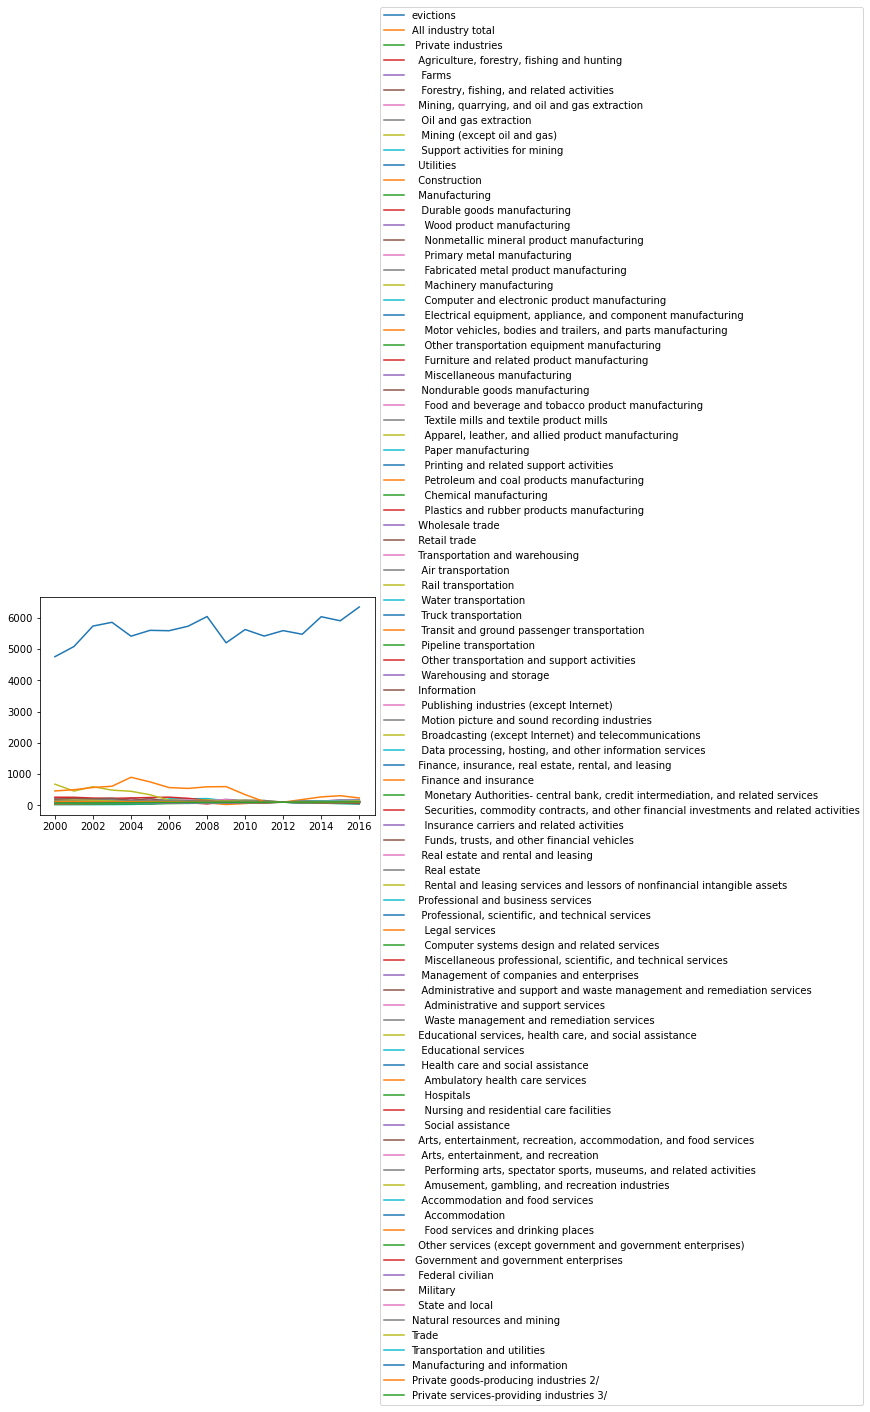

In [16]:
# Create a shared dataframe

# join the data sets
evc_gdp = pd.concat([evc_only, gdp_ind], axis=1, sort=False)

# check the data to make sure it's right
evc_gdp

evc_gdp.plot().legend(loc='center left',bbox_to_anchor=(1.0, 0.5))
# evc_gdp.plot(y='evictions')


In [64]:
# create a reduced list of industries.  The industries from the csv file have space in front indicating if they are sub industries.  We will remove most sub industries by ignoring columns with too much whitespace in front, and use the remaining columns to form a new dataset.


cols = []
for column in evc_gdp.columns:
    if not column.startswith('   '):
        cols.append(column)
cols

evc_gdp_red = evc_gdp[cols]
evc_gdp_red

Index(['evictions', 'All industry total', ' Private industries',
       '  Agriculture, forestry, fishing and hunting',
       '  Mining, quarrying, and oil and gas extraction', '  Utilities',
       '  Construction', '  Manufacturing', '  Wholesale trade',
       '  Retail trade', '  Transportation and warehousing', '  Information',
       '  Finance, insurance, real estate, rental, and leasing',
       '  Professional and business services',
       '  Educational services, health care, and social assistance',
       '  Arts, entertainment, recreation, accommodation, and food services',
       '  Other services (except government and government enterprises)',
       ' Government and government enterprises', '  Federal civilian',
       '  Military', '  State and local', 'Natural resources and mining',
       'Trade', 'Transportation and utilities',
       'Manufacturing and information',
       'Private goods-producing industries 2/',
       'Private services-providing industries 3/']

In [66]:
evc_gdp_red.plot.scatter(y='evictions',x='  Utilities').legend(loc='center left',bbox_to_anchor=(1.0, 0.5))

ValueError: x and y must be the same size

&lt;AxesSubplot:xlabel=&#39;All industry total&#39;&gt;

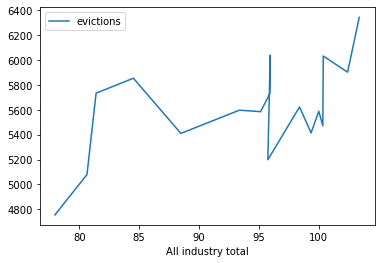

In [287]:
# plot without total GDP for better analysis
evc_gdp2 = evc_gdp.drop(columns=['All industry total'])
# check plot
col = evc_gdp.columns != 'evictions'
evc_gdp.plot(y='evictions',x='All industry total')

AxesSubplot(0.125,0.125;0.775x0.755)


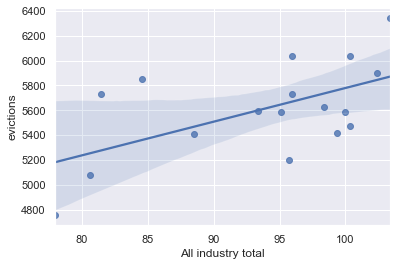

In [292]:
import seaborn as sns; sns.set_theme(color_codes=True)


ax = sns.regplot(x="All industry total", y="evictions", data=evc_gdp)
print(ax)

In [310]:
evc_gdp.dtypes

evictions                                       float64
All industry total                              float64
 Private industries                             float64
  Agriculture, forestry, fishing and hunting    float64
   Farms                                        float64
                                                 ...   
Trade                                           float64
Transportation and utilities                    float64
Manufacturing and information                   float64
Private goods-producing industries 2/           float64
Private services-providing industries 3/        float64
Length: 93, dtype: object

In [305]:
s = evc_gdp.sum()
cols = s.sort_values(ascending=False).index[:10]
cols

Index([&#39;evictions&#39;, &#39;    Petroleum and coal products manufacturing&#39;,
       &#39;    Apparel, leather, and allied product manufacturing&#39;,
       &#39;    Furniture and related product manufacturing&#39;,
       &#39;    Primary metal manufacturing&#39;, &#39;   Oil and gas extraction&#39;,
       &#39;    Textile mills and textile product mills&#39;,
       &#39;    Funds, trusts, and other financial vehicles&#39;,
       &#39;    Rental and leasing services and lessors of nonfinancial intangible assets&#39;,
       &#39;   Mining (except oil and gas)&#39;],
      dtype=&#39;object&#39;)

In [312]:
lm = LinearRegression()
# W = evc_gdp[[cols]]
lm.fit(cols, evc_gdp['evictions'])
# evc_gdp['evictions'].dtypes

ValueError: could not convert string to float: &#39;evictions&#39;

In [67]:
evc_gdp.plot(x='year',y='All industry total')

KeyError: 'year'